In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
SEEDS = [0,1,2]
CASES = ["plaintext", "amr_residual", "dep_residual"]

df_format_string = "results/indomain_results_{split}_{dataset}_seed-{seed}_{case}.csv"

def get_dataset_performance(dataset, split="test", return_precision_recall=True):
    sample_train_df = pd.read_csv(df_format_string.format(dataset=dataset, split="train", seed=0, case="plaintext"))
    label_frequencies = dict(sample_train_df["labels"].value_counts())

    results_dicts = []

    for case in CASES:
        for seed in SEEDS:
            results_dict = {"case": case, "seed": seed}
            df_filename = df_format_string.format(dataset=dataset, split=split, seed=seed, case=case)
            try:
                results_df = pd.read_csv(df_filename)
            except FileNotFoundError:
                print(f"Error with {df_filename}")
                continue
            labels = sorted(results_df["labels"].unique())
            p, r, f, _ = precision_recall_fscore_support(results_df["labels"], results_df["predictions"])
            for label, label_p, label_r, label_f in zip(labels, p, r, f):
                if return_precision_recall:
                    results_dict[f"{label}_precision"] = label_p
                    results_dict[f"{label}_recall"] = label_r
                results_dict[f"{label}_f1"] = label_f

            results_dicts.append(results_dict)

    results_df = pd.DataFrame(results_dicts)
    return results_df, label_frequencies

mscorpus_df, mscorpus_label_freq = get_dataset_performance("mscorpus", return_precision_recall=False)
risec_df, risec_label_freq = get_dataset_performance("risec", return_precision_recall=False)
efgc_df, efgc_label_freq = get_dataset_performance("japflow", return_precision_recall=False)


Error with results/indomain_results_test_japflow_seed-1_amr_residual.csv


<AxesSubplot:>

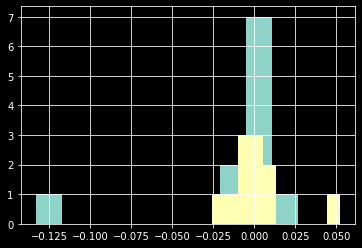

In [36]:
transpose_risec_f1s =  risec_df.groupby("case").mean().drop(columns="seed").T

(transpose_risec_f1s["dep_residual"] - transpose_risec_f1s["plaintext"]).hist(bins=10)

(transpose_risec_f1s["amr_residual"] - transpose_risec_f1s["plaintext"]).hist(bins=10)

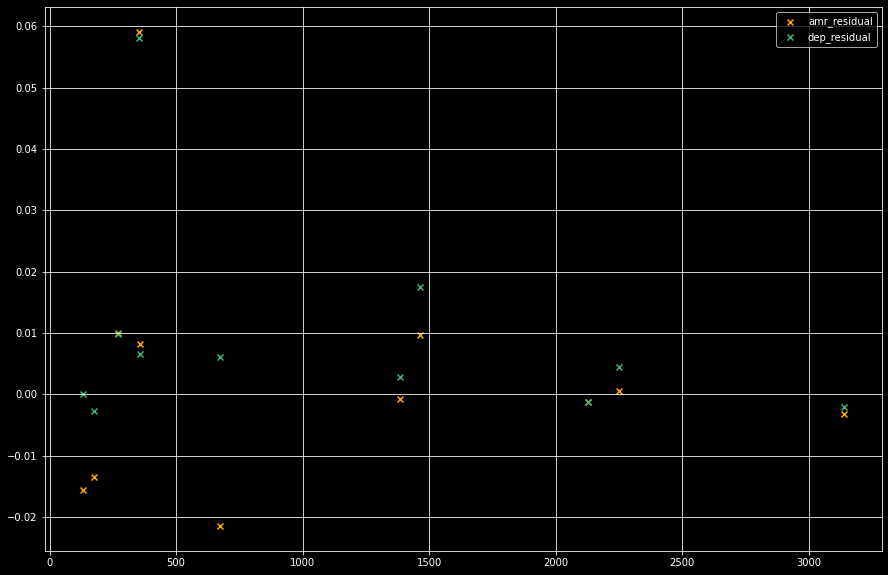

In [39]:
case_to_color = {
    "amr_residual": "orange",
    "dep_residual": "mediumseagreen",
    "plaintext": "dodgerblue"

}

def plot_frequency_vs_f1(dataset_name, results_df, label_frequencies):
    f1_df = results_df.groupby("case").mean().drop(columns="seed").T
    fig, ax = plt.subplots(figsize=(15,10))
    ax.grid()

    for case in ["amr_residual", "dep_residual"]:
        data  = [(label_frequency, f1_df.at[f"{label}_f1", case] - f1_df.at[f"{label}_f1", "plaintext"]) for label, label_frequency in label_frequencies.items()]
        ax.scatter(*zip(*data), color=case_to_color[case], marker="x", label=case)

    ax.legend()


plot_frequency_vs_f1("mscorpus", mscorpus_df, mscorpus_label_freq)


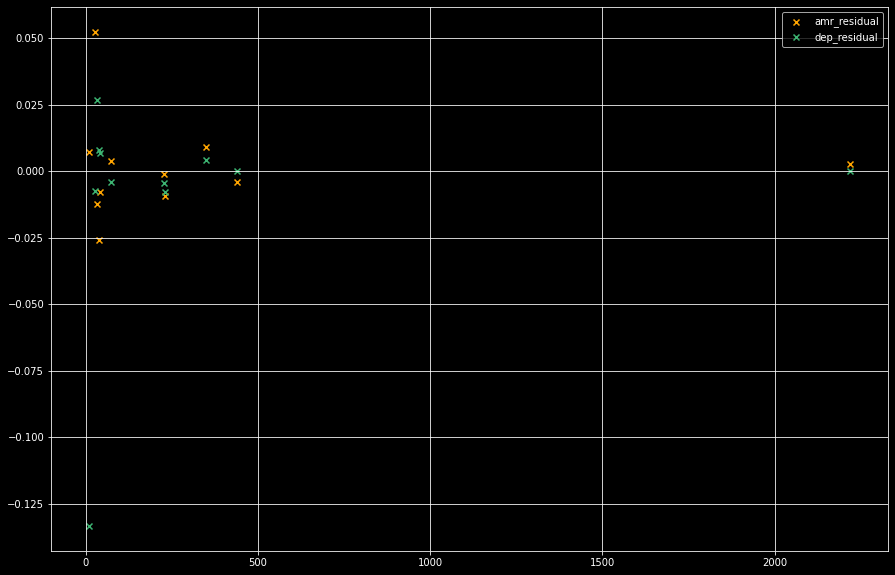

In [40]:
plot_frequency_vs_f1("risec", risec_df, risec_label_freq)

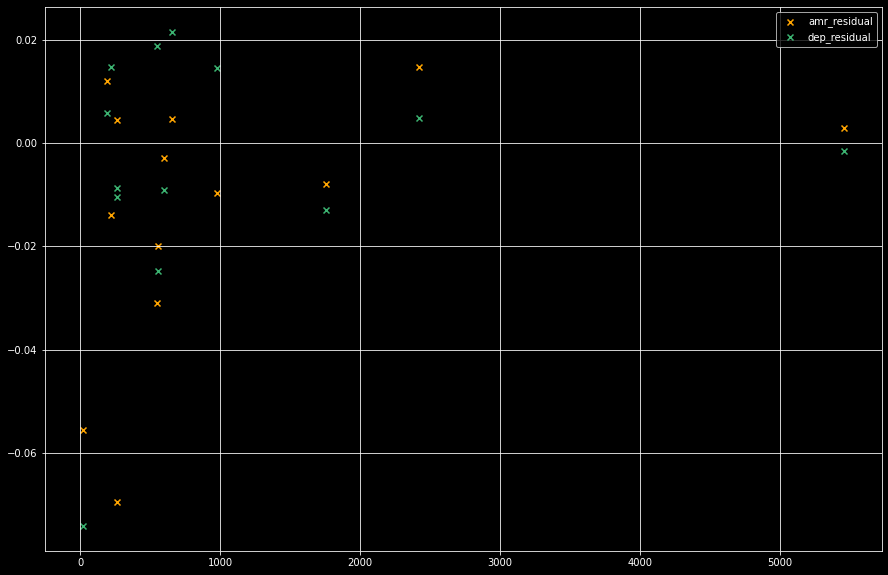

In [41]:
plot_frequency_vs_f1("efgc", efgc_df, efgc_label_freq)

In [ ]:
mscorpus_f1s = mscorpus_df.groupby("case").mean().drop(columns="seed").T
mscorpus_f1s

In [ ]:
(mscorpus_f1s["amr_residual"] - mscorpus_f1s["plaintext"])

In [ ]:
sample_train_df = pd.read_csv(df_format_string.format(dataset="mscorpus", split="train", seed=0, case="plaintext"))
label_frequencies = dict(train_df["labels"].value_counts())




fig, ax = plt.subplots(figsize=(15,20))
ax.grid()

for case in CASES:
    data  = [(label_frequency, mscorpus_f1s.at[f"{label}_f1", case]) for label, label_frequency in label_frequencies.items()]
    ax.scatter(*zip(*data), color=case_to_color[case], marker="x", label=case)

ax.legend()



In [10]:
f1_df = mscorpus_df.groupby("case").mean().drop(columns="seed")

In [11]:
f1_df

,Apparatus_Of_f1,Condition_Of_f1,Coref_Of_f1,Information_Of_f1,Next_Operation_f1,Number_Of_f1,Participant_Material_f1,Recipe_Precursor_f1,Recipe_Target_f1,Solvent_Material_f1,Type_Of_f1
case,,,,,,,,,,,
amr_residual,0.964789,0.989332,0.897340,0.980066,0.985754,0.998523,0.775068,0.691323,0.704381,0.689621,0.984455
dep_residual,0.963232,0.992897,0.908126,0.981170,0.989658,0.998518,0.782875,0.718960,0.704271,0.688672,1.000000
plaintext,0.956628,0.990113,0.910835,0.983251,0.985238,0.999754,0.765370,0.712793,0.694372,0.630528,1.000000
